## Hierarchical Clustering

Theory of Hierarchical Clustering

There are two types of hierarchical clustering: Agglomerative and Divisive. 
In the former, data points are clustered using a bottom-up approach starting with individual data points, while in the latter top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

Steps to Perform Hierarchical Clustering
Following are the steps involved in agglomerative clustering:

At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
Form a cluster by joining the two closest data points resulting in K-1 clusters.
Form more clusters by joining the two closest clusters resulting in K-2 clusters.
Repeat the above three steps until one big cluster is formed.
Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.

There are different ways to find distance between the clusters. The distance itself can be Euclidean or Manhattan distance. Following are some of the options to measure distance between two clusters:

Measure the distance between the closes points of two clusters.
Measure the distance between the farthest points of two clusters.
Measure the distance between the centroids of two clusters.
Measure the distance between all possible combination of points between the two clusters and take the mean.


In [8]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

X = np.array([[1,2],[3,5],[5,10],[8,12],[12,15],[40,20],[50,40],[60,50],[90,80],[99,89],])

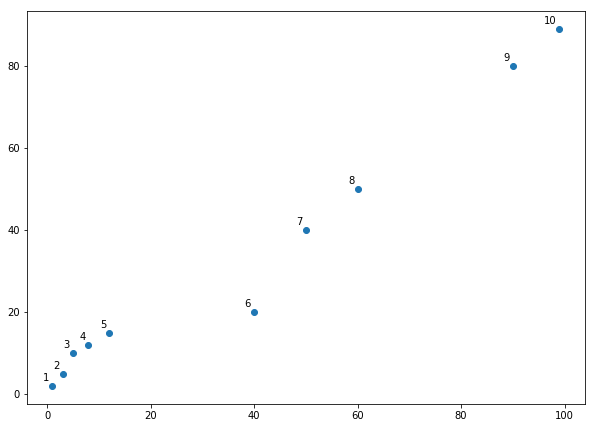

In [3]:
import matplotlib.pyplot as plt

labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
#plt.show()  

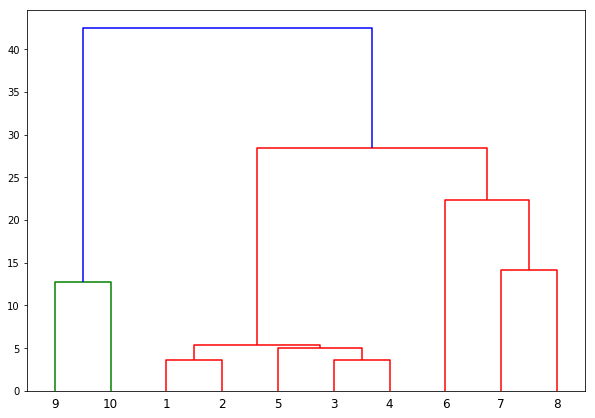

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

The algorithm starts by finding the two points that are closest to each other on the basis of Euclidean distance. If we look back at Graph, we can see that points 3 and 4 are closest to each other while points 9 and 10 are closes to each other. Therefore a cluster will be formed between these two points first. In Graph, you can see that the dendograms have been created joining points 3 with 4, and 9 with 10. The vertical height of the dendogram shows the Euclidean distances between points. From Graph, it can be seen that Euclidean distance between points 9 and 10 is greater than the distance between point 3 and 4.

The next step is to join the cluster formed by joining two points to the next nearest cluster or point which in turn results in another cluster. If you look at Graph, point 5 is closest to cluster of point 3 and 4, therefore in Graph dendrogram is generated by joining point 5 with dendrogram of point 3 and 4. This process continues until all the points are joined together to form one big cluster.

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters. 

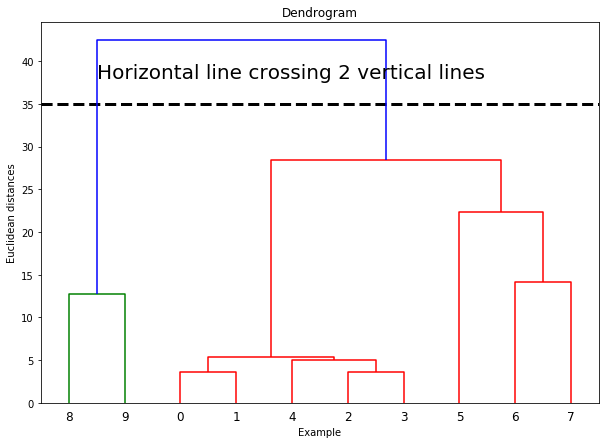

In [5]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
plt.xlabel('Example')
plt.ylabel('Euclidean distances')
plt.hlines(y=35,xmin=0,xmax=150,lw=3,linestyles='--')
plt.text(x=10,y=38,s='Horizontal line crossing 2 vertical lines',fontsize=20)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'single'))
plt.show()

In [6]:
print(linked)

[[ 0.          1.          3.60555128  2.        ]
 [ 2.          3.          3.60555128  2.        ]
 [ 4.         11.          5.          3.        ]
 [10.         12.          5.38516481  5.        ]
 [ 8.          9.         12.72792206  2.        ]
 [ 6.          7.         14.14213562  2.        ]
 [ 5.         15.         22.36067977  3.        ]
 [13.         16.         28.44292531  8.        ]
 [14.         17.         42.42640687 10.        ]]


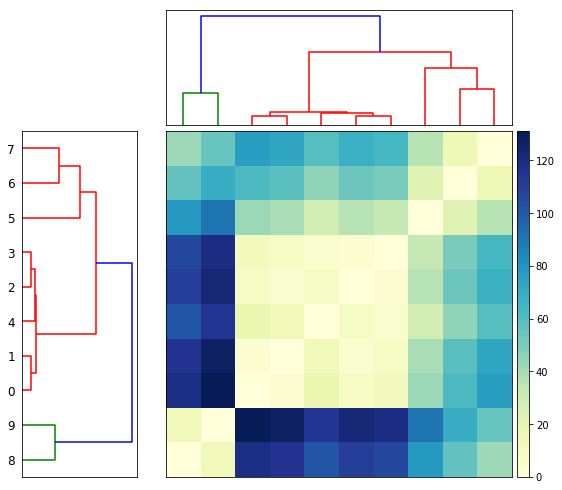

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

data_dist = pdist(X)
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='single')
Z1 = dendrogram(Y, orientation='right') # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

K-means is a simple unsupervised machine learning algorithm that groups a dataset 
into a user-specified number (k) of clusters. The algorithm is somewhat naive--it 
clusters the data into k clusters, even if k is not the right number of clusters to use.
Therefore, when using k-means clustering, users need some way to determine whether 
they are using the right number of clusters.

One method to validate the number of clusters is the elbow method. 
The idea of the elbow method is to run k-means clustering on the dataset for 
a range of values of k (say, k from 1 to 10 in the examples above), and for each 
value of k calculate the sum of squared errors (SSE).

Then, plot a line chart of the SSE for each value of k. If the line chart looks 
like an arm, then the "elbow" on the arm is the value of k that is the best.

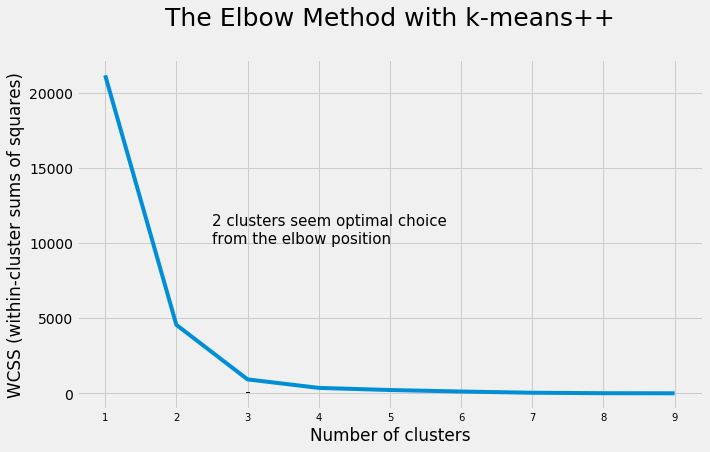

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 10), wcss)
    plt.title('The Elbow Method with k-means++\n',fontsize=25)
    plt.xlabel('Number of clusters')
    plt.xticks(fontsize=10)
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.vlines(x=3,ymin=0,ymax=100,linestyles='--')
    plt.text(x=2.5,y=10000,s='2 clusters seem optimal choice \nfrom the elbow position',
             fontsize=15,fontdict={'family':'Times New Roman'})
    plt.show()